# Ch.7 Data Visualization
In this notebook we'll see the kind of plots mostly used in financial data analysis

In [29]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'
print('Matplotlib version: {}'.format(mpl.__version__))
print('NumPy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))
print('Plotly version: {}'.format(plotly.__version__))
print('Cufflinks version: {}'.format(cf.__version__))
import warnings
warnings.filterwarnings('ignore')

Matplotlib version: 3.8.4
NumPy version: 1.26.4
Pandas version: 2.2.2
Plotly version: 5.24.1
Cufflinks version: 0.17.3


## Plot
The most common Matplotlib function is used to plot a 2D graph of a univariate function, of the kind *y = f(x)*, or a time series. As an example, we can simulate a Gaussian process that we sample for 20 time intervals of the same size

In [4]:
np.random.seed(1000)

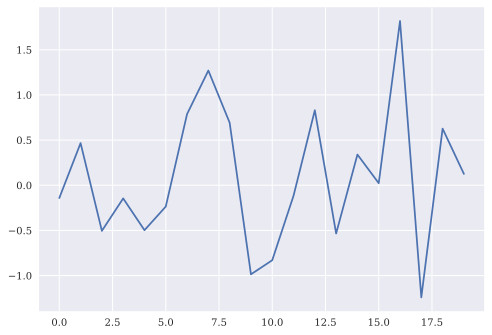

In [9]:
rng = np.random.default_rng()
num_samples = 20
y = rng.standard_normal(num_samples)
t = np.arange(num_samples)
plt.plot(t, y);

We can sample more than one process 

In [49]:
num_processes = 2
y = np.random.standard_normal((num_samples, num_processes))
y.shape

(20, 2)

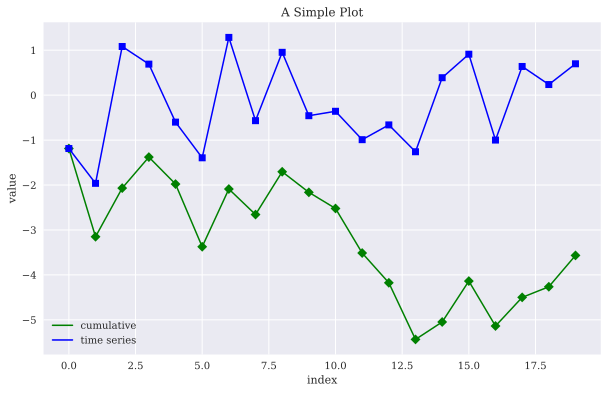

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0].cumsum(axis=0), color='green', lw=1.5, label='cumulative')
plt.plot(y[:, 0].cumsum(axis=0), 'gD')
plt.plot(y[:, 0], color='b', lw=1.5, label='time series')
plt.plot(y[:, 0], 'bs')
plt.legend(loc='lower left')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot');

## Bar plot
The bar plot can be used for histograms or to compare values.

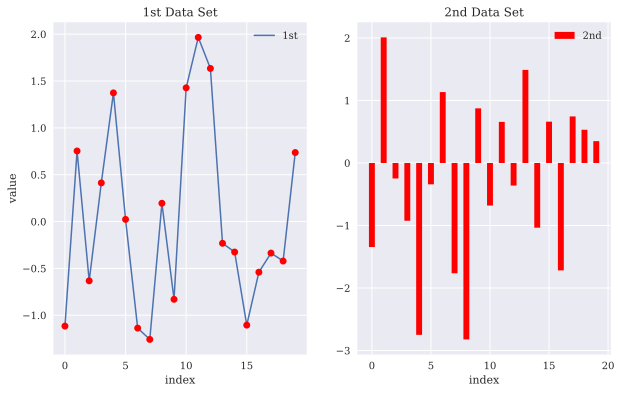

In [58]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.title('1st Data Set')
plt.subplot(122)
x = np.arange(len(y))
plt.bar(x, y[:, 1], width=0.5, color='r', label='2nd')
plt.legend(loc=0)
plt.xlabel('index')
plt.title('2nd Data Set');

## 2D scatter plot

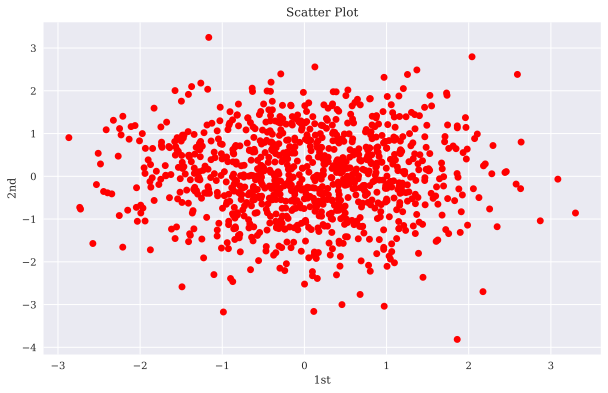

In [59]:
y = np.random.standard_normal((1000, 2))
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1], 'ro')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot');

Text(0.5, 0, '1st')

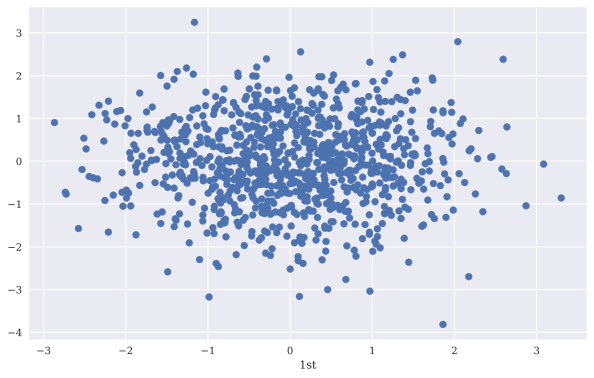

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], marker='o')
plt.xlabel('1st')

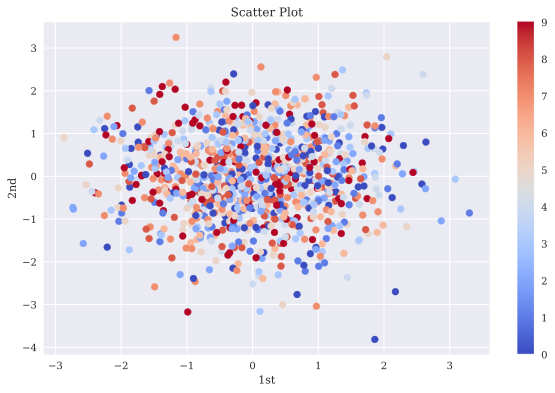

In [61]:
c = np.random.randint(0, 10, len(y))
In [28]: plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], c=c, cmap='coolwarm', marker='o')
plt.colorbar()
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot');

## Histogram

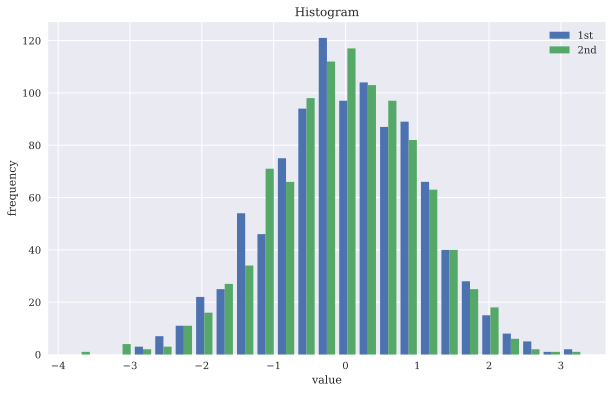

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], bins=25)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram');

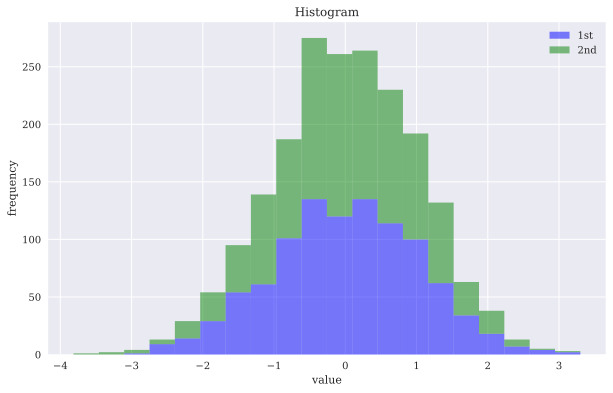

In [66]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'], stacked=True, bins=20, alpha=0.5)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram');

## Box plot

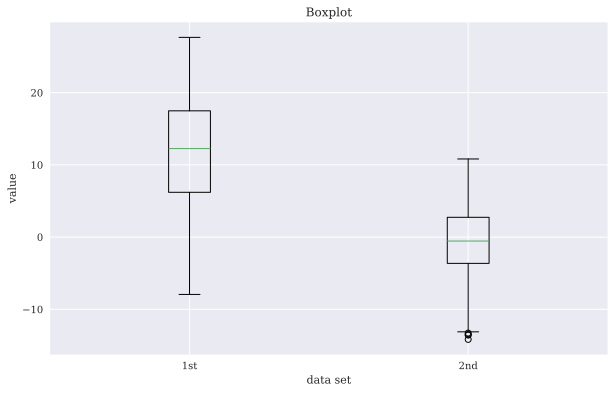

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot(y.cumsum(axis=0))
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot');

## Area

In [2]:
def func(x):
    return 0.5 * np.exp(x) + 1

In [3]:
def integral(a, b, y):
    Ix = np.linspace(a, b)
    Iy = func(Ix) # <6>
    verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
    return verts

In [4]:
x = np.linspace(0, 2)
a, b = 0.5, 1.5
y = func(x)
verts = integral(a, b, y)

[Text(0, 1.824360635350064, '$f(a)$'), Text(0, 3.2408445351690323, '$f(b)$')]

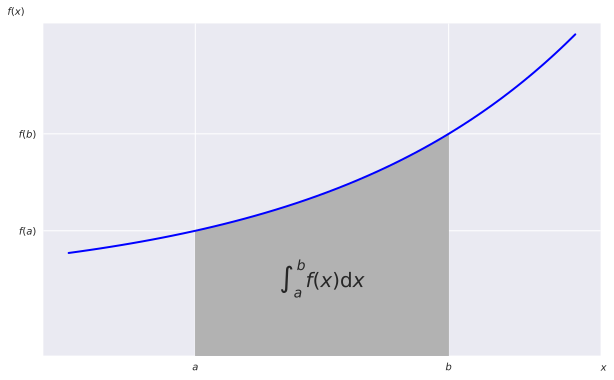

In [5]:
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a + b), 1, r'$\int_a^b f(x)\mathrm{d}x$',
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)])
ax.set_yticklabels(('$f(a)$', '$f(b)$'))

## 3D plot

In [6]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)
strike[:2].round(1)
iv = (strike - 100) ** 2 / (100 * strike) / ttm
iv[:5, :3]

array([[1.        , 0.76695652, 0.58132045],
       [0.85185185, 0.65333333, 0.4951989 ],
       [0.74193548, 0.56903226, 0.43130227],
       [0.65714286, 0.504     , 0.38201058],
       [0.58974359, 0.45230769, 0.34283001]])

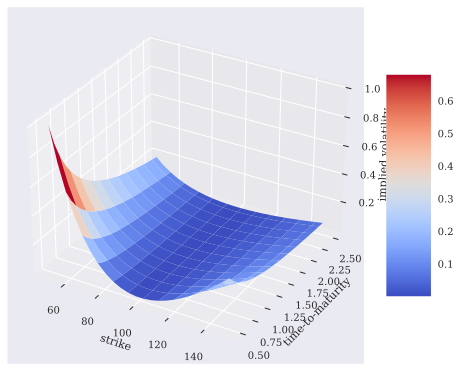

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8, 8))
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                       cmap=plt.cm.coolwarm, linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=5);

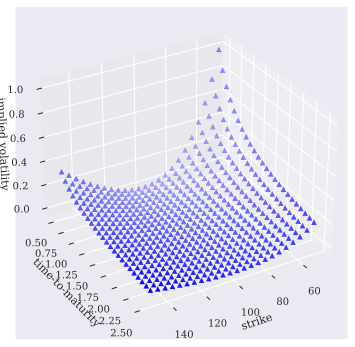

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(strike, ttm, iv, zdir='z', s=25,
           c='b', marker='^')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility');

## Cufflinks

In [16]:
cf.set_config_file(offline=True)
a = np.random.standard_normal((250, 5)).cumsum(axis=0)
index = pd.date_range('2019-1-1',
                      freq='D',
                      periods=len(a))
df = pd.DataFrame(100 + 5 * a,
                  columns=list('abcde'),
                  index=index.astype(str))
df.head(3)

,a,b,c,d,e
2019-01-01,102.177583,105.228181,99.745262,98.441572,99.840714
2019-01-02,100.717943,103.428924,101.457238,99.682917,102.670759
2019-01-03,97.406380,105.498220,108.473717,90.514240,103.317783


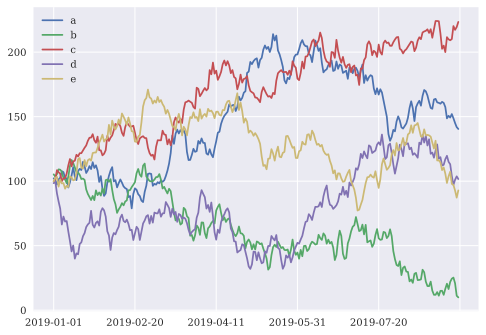

In [17]:
df.plot();

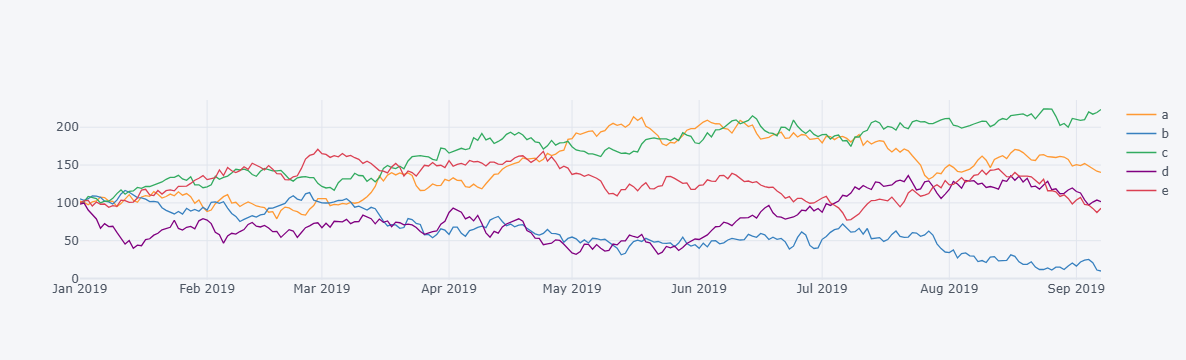

In [19]:
df.iplot()

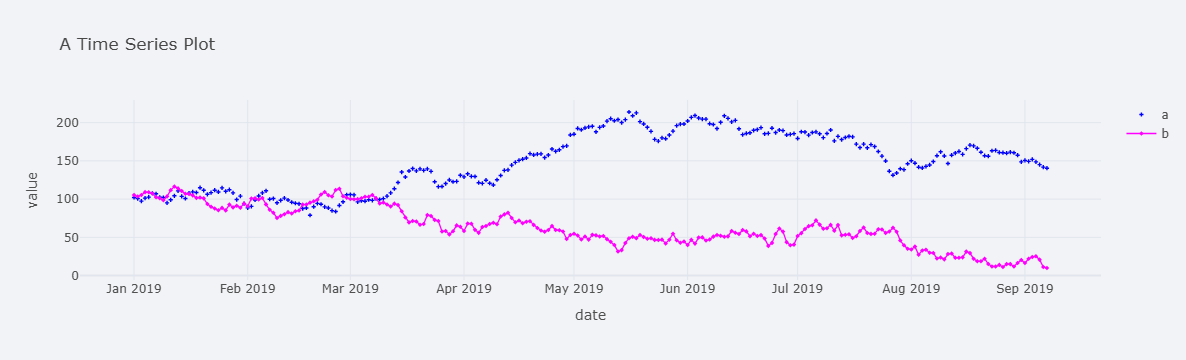

In [20]:
df[['a', 'b']].iplot(
             theme='polar',
             title='A Time Series Plot',
             xTitle='date',
             yTitle='value',
             mode={'a': 'markers', 'b': 'lines+markers'},
             symbol={'a': 'cross', 'b': 'diamond'},
             size=3.5,
             colors={'a': 'blue', 'b': 'magenta'},
                        )

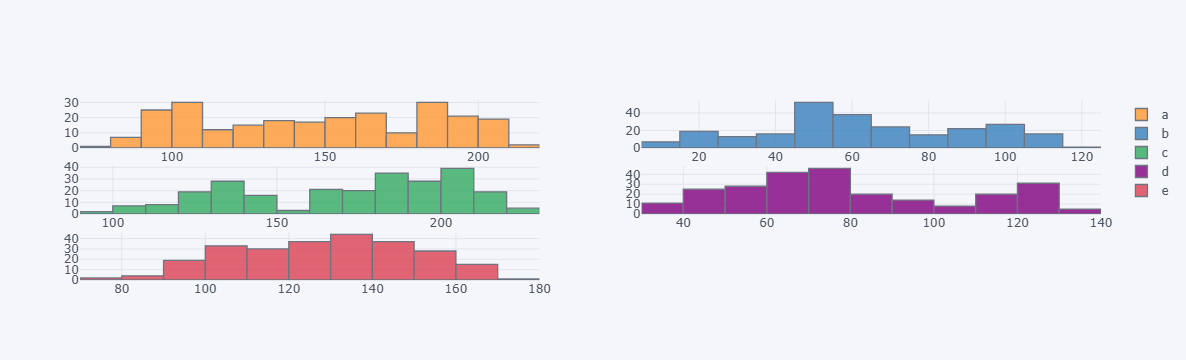

In [21]:
df.iplot(kind='hist',
             subplots=True,
             bins=15,
        )

## Financial data

In [22]:
# data from FXCM Forex Capital Markets Ltd.
raw = pd.read_csv('https://hilpisch.com/fxcm_eur_usd_eod_data.csv',
                 index_col=0, parse_dates=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1547 entries, 2013-01-01 22:00:00 to 2017-12-31 22:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   1547 non-null   float64
 1   BidHigh   1547 non-null   float64
 2   BidLow    1547 non-null   float64
 3   BidClose  1547 non-null   float64
 4   AskOpen   1547 non-null   float64
 5   AskHigh   1547 non-null   float64
 6   AskLow    1547 non-null   float64
 7   AskClose  1547 non-null   float64
dtypes: float64(8)
memory usage: 108.8 KB


In [24]:
quotes = raw[['AskOpen', 'AskHigh', 'AskLow', 'AskClose']]
quotes = quotes.iloc[-60:]
quotes.tail(3)

,AskOpen,AskHigh,AskLow,AskClose
2017-12-27 22:00:00,1.18885,1.19592,1.18885,1.19426
2017-12-28 22:00:00,1.19426,1.20256,1.19369,1.20092
2017-12-31 22:00:00,1.20092,1.20144,1.19994,1.20144


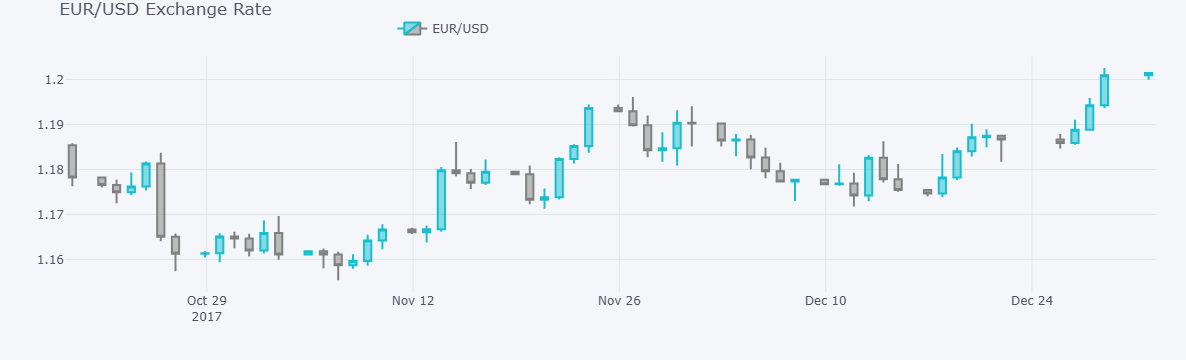

In [26]:
qf = cf.QuantFig(
         quotes,
         title='EUR/USD Exchange Rate',
         legend='top',
         name='EUR/USD'
)
qf.iplot()

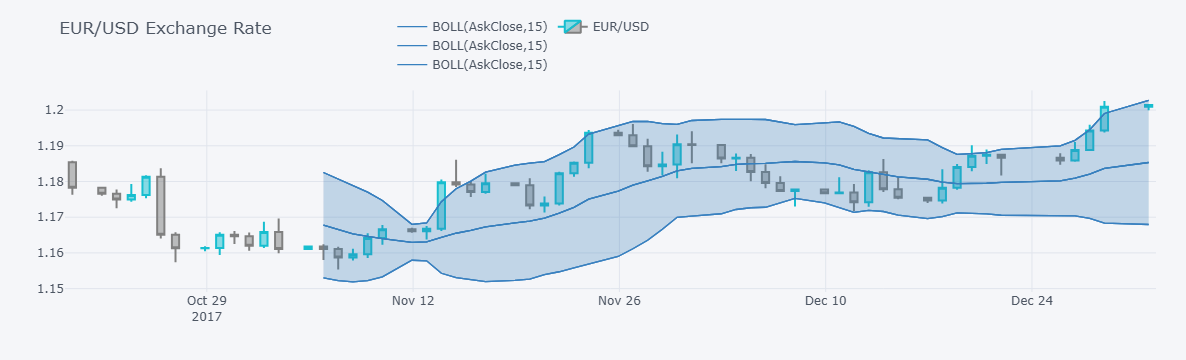

In [30]:
qf.add_bollinger_bands(periods=15,
                       boll_std=2)
qf.iplot()

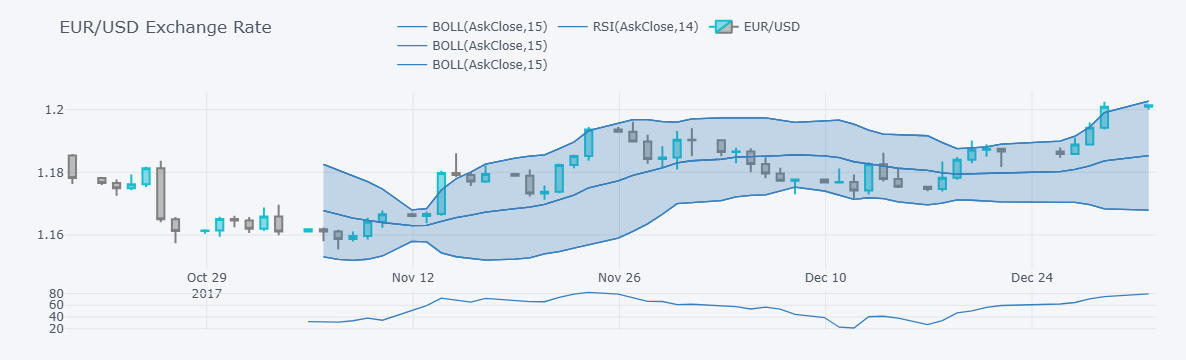

In [31]:
qf.add_rsi(periods=14,
          showbands=False)
qf.iplot()